In this example, we first load the Iris dataset and create a Pandas DataFrame from it. We then fit a KMeans model to the data with 3 clusters. We predict the cluster labels for the data, and then visualize the clusters using a scatter plot. The x-axis represents the sepal length in centimeters, the y-axis represents the sepal width in centimeters, and the color of each point represents the cluster it belongs to.

Note that the number of clusters (in this case, 3) is somewhat arbitrary and may need to be adjusted depending on the data and the problem being solved. To find the optimal number of clusters, we could use techniques such as the elbow method or silhouette analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [11]:
# Load the Iris dataset
iris = pd.read_csv('Iris.csv')

In [12]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
# Select the features we want to use for clustering
X = iris_df.iloc[:, :2].values

C:\Users\divya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


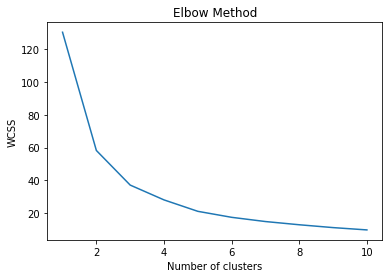

In [20]:
# Use the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
# Train a KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(X)

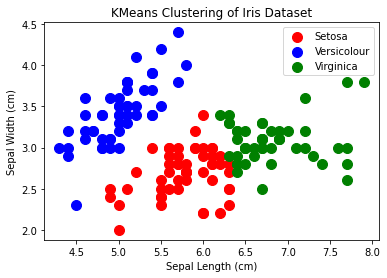

In [22]:
# Visualize the clusters
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=100, c='red', label='Setosa')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=100, c='blue', label='Versicolour')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=100, c='green', label='Virginica')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering of Iris Dataset')
plt.legend()
plt.show()